In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_albis_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Bisabolol
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.000000
2,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,6,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,9,0.263696,0.018027,-0.040742,-0.177703,0.057154,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42969,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.105263
74996,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.105263
74997,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.105263
74998,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.105263


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..Alpha-Bisabolol'], axis = 1)
y = df_rf[['X..Alpha-Bisabolol']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.10526316],
       [0.10526316],
       [0.10526316]])

<Axes: ylabel='Count'>

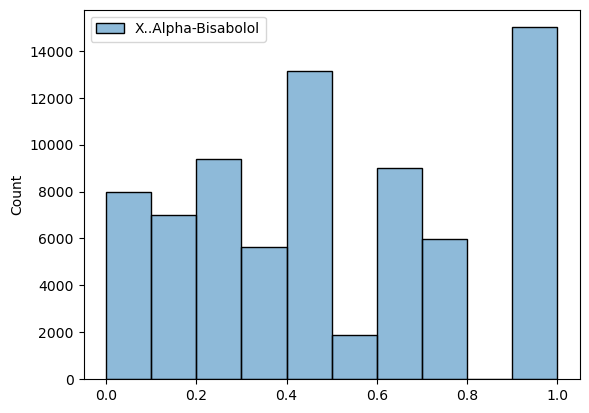

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1329/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.026717563577204177

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.004545355791236129

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.06741925386146104

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9881977913181358

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9563509312515088

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.116841
1,lsa_1,0.093878
2,lsa_2,0.106300
3,lsa_3,0.099626
4,lsa_4,0.099480
...,...,...
81,tree,0.000668
82,tropical,0.001131
83,vanilla,0.002086
84,violet,0.000091


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
45,cheese,1.203982e-01
0,lsa_0,1.168412e-01
2,lsa_2,1.063002e-01
3,lsa_3,9.962632e-02
4,lsa_4,9.947962e-02
1,lsa_1,9.387828e-02
6,indica,8.953205e-02
71,pungent,2.020744e-02
43,blueberry,1.261924e-02
26,hungry,1.027367e-02


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([1.16264886e-01, 9.46764147e-02, 1.04887086e-01, 1.01410282e-01,
       1.00951374e-01, 7.17689195e-03, 8.90903575e-02, 1.00589656e-02,
       4.46151576e-04, 2.80416509e-03, 4.62316889e-03, 4.82359691e-07,
       7.53304254e-03, 9.26496891e-04, 3.28554157e-03, 4.45340451e-03,
       8.50333680e-03, 5.98334359e-03, 6.10036685e-07, 7.49167958e-03,
       6.60388727e-07, 1.64028499e-06, 7.31334444e-03, 5.09710471e-03,
       8.24726137e-03, 2.91723709e-03, 9.12762946e-03, 9.84916579e-04,
       4.83532571e-07, 1.67443985e-03, 8.00176809e-03, 4.27976805e-07,
       7.08643664e-03, 0.00000000e+00, 0.00000000e+00, 5.19484627e-03,
       5.74113681e-03, 8.29709188e-03, 5.04418867e-04, 1.43116786e-04,
       6.39420524e-05, 9.04488230e-03, 3.96586042e-04, 1.25635939e-02,
       6.06716602e-04, 1.20693961e-01, 2.85909279e-03, 2.42306141e-04,
       6.13366222e-03, 1.53402861e-03, 4.56100353e-03, 7.75839557e-03,
       3.16641405e-03, 2.72432164e-04, 4.50193442e-03, 3.71403314e-04,
      

In [23]:
selector.threshold_

0.011627906976744186

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,indica,blueberry,cheese,pungent
0,0.341025,0.182753,0.008214,0.140406,-0.156943,0,0,0,0
1,0.243491,0.034313,0.080290,-0.165609,0.019773,0,0,1,0
2,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,0,0,0,0
3,0.276418,-0.133986,0.116293,0.073694,0.041143,0,0,0,0
4,0.263696,0.018027,-0.040742,-0.177703,0.057154,0,0,1,0
...,...,...,...,...,...,...,...,...,...
74995,0.109738,-0.066611,-0.064934,0.145920,-0.069040,1,0,0,0
74996,0.184573,-0.137296,-0.095301,0.181735,-0.042683,1,0,0,0
74997,0.184573,-0.137296,-0.095301,0.181735,-0.042683,1,0,0,0
74998,0.181714,-0.045560,-0.055692,0.015649,-0.045585,1,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_albis.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_albis.pkl")

['selected_X_rf_lsa_elbow_albis.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1329/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.029550566903983774

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.005388269791298299

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07340483493134699

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9776143603245075

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9481887058915754

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/li

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_albis.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_albis.pkl")

['rscv_rf_lsa_elbow_best_params_albis.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 300, min_samples_split = 2, max_features = 'sqrt', min_samples_leaf = 1, max_depth = 100)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_1329/3266429238.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.028891071662785758

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.0049919476253328906

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07065371628819599

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9784641304452731

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.9519995700646505

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_albis.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_albis.pkl")

['y_test_rfreg_lsa_elbow_albis.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.029487026225769618

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.0050542078037976446

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.07109295185739332

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.9521558374538954

Error analysis

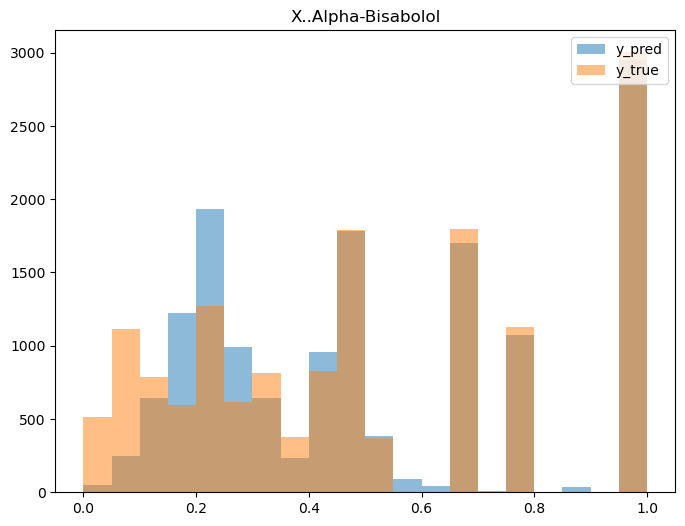

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Bisabolol"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_albis.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.978
P-value: 0.000


<Axes: >

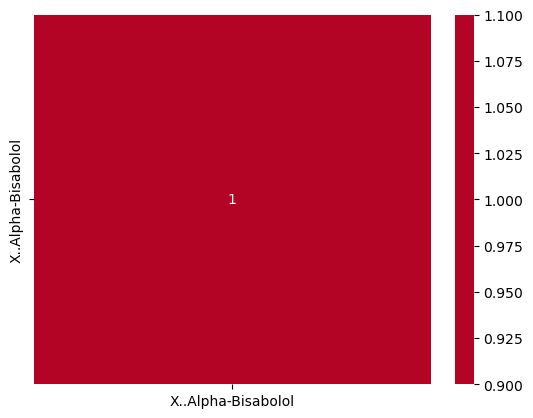

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)